<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h2>A2: Regression Model Development (Individual)</h2>
Marc Zürn<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
To get started on the Regression, I first define all of the functions and enter all of the libraries that will be utilized. After that, I import all of the data that was utilized and perform an analysis on it to look for anomalies and significant correlations. This is accomplished through the use of the Pearson correlation as well as the visualization of a variety of significant characteristics in connection to the revenue and log revenue. Following the completion of the analysis, I will begin the process of feature engineering with the intention of adding some features to the data. After this, a brief linear regression and several model trainings are carried out in an effort to locate the most accurate predictive model possible, taking into account both the provided and developed attributes.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## Introduction
### Functions
To begin, I will use the following cell to describe the functions I will use in the future. This function will print a visualization of the columns in the dataset as well as the effect those columns have on the value. As a result of this, the significance of the impact that specific attributes had on the model that was used can be seen.

In addition, I created a function that produces the same results every time it is called, including the model's name, its train score, its test score, and its difference.

In [1]:
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    # exports the plot to a file in export equals True
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')
        
def printModel(model_name, model_train_score, model_test_score, model_gap):
    # displaying all results including the best model
    print(f"""Model Name:       {model_name}
    Train_Score:      {model_train_score}
    Test_Score:       {model_test_score}
    Train-Test Gap:   {model_gap} 
    """)

### Imports
The following cell is what's going to be used to import all of the libraries and machine-learning models that will be used, as well as retrieve the dataset off of my local machine. After that, a couple of entries from the beginning of the dataset are displayed graphically.

In [2]:
# importing critical libraries
import pandas            as pd                 # data science essentials
import matplotlib.pyplot as plt                # data visualization
import seaborn           as sns                # enhanced data viz
import numpy as np                             # mathematical essentials
import statsmodels.formula.api as smf          # regression modeling

# importing machine learning models
from sklearn.tree     import DecisionTreeRegressor     # regression trees
from sklearn.ensemble import RandomForestRegressor     # random forest
from sklearn.ensemble import GradientBoostingRegressor # gbm
import sklearn.linear_model # linear modeling in scikit-learn


# importing machine learning tools
from sklearn.model_selection import train_test_split # train-test split
from sklearn.tree import plot_tree                   # tree plots


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './Apprentice_Chef_Dataset_2023.xlsx'


# reading the file into Python
chef = pd.read_excel(file)

In [3]:
# Show the first couple datasets
chef.head(5)

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174


The following cell outputs the amount of non available values per column. It shows, that the only the Family name is missing values. To complete this step, one strategy would be to type "" into each of the 46 columns and then generate another binary column that indicates that the value has been filled in. But since we are going to get rid of all category data in the future, including family name, I just left it like this.

In [4]:
# Check for missing values
chef.isnull().sum(axis = 0)
# shows, only FAMILY_NAME nas NULL values

REVENUE                         0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    46
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
CANCELLATIONS_AFTER_NOON        0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
LATE_DELIVERIES                 0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
AVG_MEAN_RATING                 0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

## Feature Engineering
### Analysing the Attributes
The first thing that needs to be done is to organize the data based on whether or not it is continuous data, interval data, or categorical data. After that, the output provides a description of each numerical column, including its total, mean, standard deviation, minimum, maximum, and other values. It is clear from looking at the data in the minimum row that the numbers for CANCELLATIONS AFTER NOON, MOBILE LOGINS, WEEKLY PLAN, and LATE DELIVERIES are all 0. As a result, I conducted additional research on them to develop Qualities based on the values they contain. For instance, the WEEKLY PLAN has a mean value of 7, which can be implemented into a binary feature that indicates whether the data is higher than or lower than 7.

In [5]:
#All CONTINUOUS variables
CONTINUOUS = ['REVENUE', 'AVG_TIME_PER_SITE_VISIT', 'AVG_PREP_VID_TIME', 'AVG_MEAN_RATING']

#All INTERVAL variables
INTERVAL = ['TOTAL_MEALS_ORDERED', 
            'UNIQUE_MEALS_PURCH', 
            'CONTACTS_W_CUSTOMER_SERVICE',
            'PRODUCT_CATEGORIES_VIEWED', 
            'CANCELLATIONS_AFTER_NOON', 
            'LATE_DELIVERIES ', 
            'PC_LOGINS',
            'MOBILE_LOGINS', 
            'WEEKLY_PLAN',
            'LARGEST_ORDER_SIZE',  
            'TOTAL_PHOTOS_VIEWED']

#All CATEGORICAL variables
CATEGORICAL = ['NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME']


In [6]:
chef.describe(include = 'number').round(2)

,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,74.63,6.98,4.9,5.38,150.56,1.57,5.52,1.48,11.33,2.05,99.60,4.44,3.55,113.15
std,1138.29,55.31,2.28,2.5,3.04,49.45,1.61,0.58,0.53,13.57,3.79,62.34,1.55,0.61,177.15
min,131.00,11.00,1.00,1.0,1.00,33.40,0.00,4.00,0.00,0.00,0.00,10.33,1.00,1.32,1.00
25%,1350.00,39.00,5.00,3.0,3.00,114.40,0.00,5.00,1.00,1.00,0.00,72.00,3.00,3.16,10.00
50%,1740.00,60.00,7.00,5.0,5.00,145.60,1.00,6.00,1.00,7.00,0.00,94.16,4.00,3.42,17.00
75%,2670.00,95.00,8.00,7.0,8.00,173.78,2.00,6.00,2.00,13.00,3.00,117.29,5.00,3.95,174.00
max,8793.75,493.00,18.00,19.0,10.00,564.20,13.00,7.00,3.00,52.00,18.00,1645.60,11.00,5.00,1600.00


In [7]:
#chef.loc[:,['CANCELLATIONS_AFTER_NOON']].value_counts()
chef.loc[:,['WEEKLY_PLAN']].describe()

,WEEKLY_PLAN
count,1946.000000
mean,11.329908
std,13.573303
min,0.000000
25%,1.000000
50%,7.000000
75%,13.000000
max,52.000000


The Y-variable REVENUE is the single most important variable in this equation. As a result, I decided to represent it using a histogram, where I discovered that it is not very uniform and has a significant skewness. This brings us to the next stage, which is to compute the log of the revenue in order to determine which of the two has a smaller skewness. In a for-loop, this operation is repeated for each continuous value. In addition to this, I print out the findings to determine which of the two attributes, normal or logarithmic, has a lower skewness value.

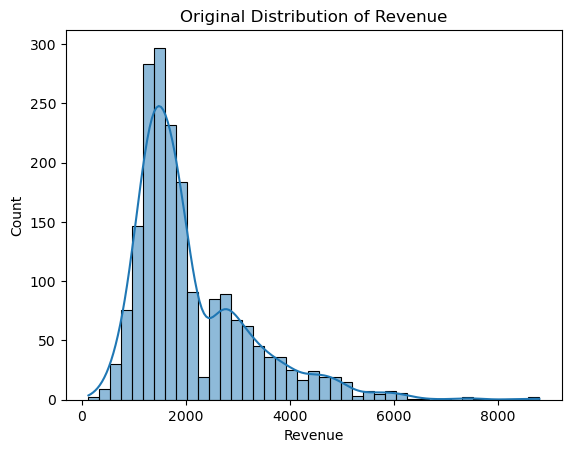

In [8]:
# developing a histogram using HISTPLOT
sns.histplot(data  = chef,
         x     = 'REVENUE',
        kde    = True)

# title and axis labels
plt.title(label   = "Original Distribution of Revenue")
plt.xlabel(xlabel = "Revenue") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()

In [9]:
# calculate the log values of all CONTINUOUS variables
for x in CONTINUOUS:
    chef['log_'+ x ] = np.log(chef[x])

The difference between the regular column and the logarithmic column is displayed in the output of the skewness function. In the following model, the processing begins with a value that is closer to 0, and values further from 0 are discarded at a later step. Then, a Histogram of the log REVENUE was presented so that the change in skewness could be seen more clearly. It has a look that is more symmetrical than others.

In [10]:
# print the skewness of all CONTINUOUS Data + Log
for x in CONTINUOUS:
    print(chef[[x,'log_'+ x]].skew())

REVENUE        1.626573
log_REVENUE    0.184090
dtype: float64
AVG_TIME_PER_SITE_VISIT        1.200283
log_AVG_TIME_PER_SITE_VISIT   -0.063739
dtype: float64
AVG_PREP_VID_TIME        9.639388
log_AVG_PREP_VID_TIME   -0.490844
dtype: float64
AVG_MEAN_RATING       -0.113411
log_AVG_MEAN_RATING   -0.700982
dtype: float64


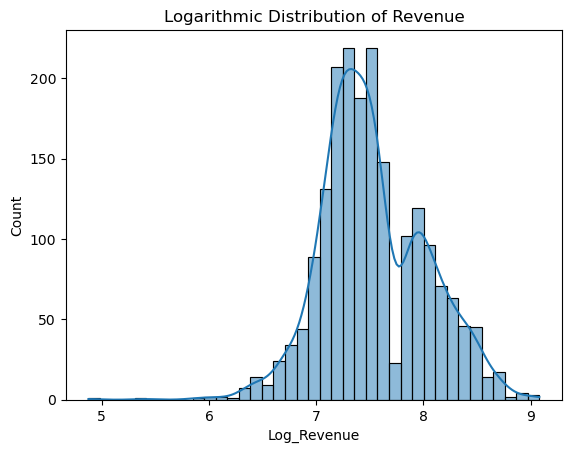

In [11]:
# developing a histogram using HISTPLOT
sns.histplot(data  = chef,
         x     = 'log_REVENUE',
        kde    = True)

# title and axis labels
plt.title(label   = "Logarithmic Distribution of Revenue")
plt.xlabel(xlabel = "Log_Revenue") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()

### Pearson Correlation
The strength and direction of a linear connection between two variables can be determined by using the Pearson correlation to analyze the data. It is possible to get a visual representation of the degree to which two factors are dependent on one another. The link between AVG TIME PER SITE VISIT and REVENUE and log REVENUE is the strongest of all variables. The log AVG MEAN RATING has the strongest negative association. The strong correlations are also reflected in the graph that depicts the significance of features.

In [12]:
chef_corr = chef.corr(method = 'pearson').round(decimals = 2)

chef_corr = chef_corr.drop(labels = ['REVENUE', 'log_REVENUE'])

chef_corr = chef_corr.loc[:, ['REVENUE', 'log_REVENUE']].sort_values(by = 'REVENUE', ascending = False)

chef_corr

,REVENUE,log_REVENUE
AVG_TIME_PER_SITE_VISIT,0.64,0.65
log_AVG_TIME_PER_SITE_VISIT,0.63,0.67
TOTAL_MEALS_ORDERED,0.60,0.61
TOTAL_PHOTOS_VIEWED,0.46,0.43
LARGEST_ORDER_SIZE,0.44,0.45
CONTACTS_W_CUSTOMER_SERVICE,0.17,0.18
log_AVG_PREP_VID_TIME,0.15,0.15
AVG_PREP_VID_TIME,0.14,0.14
UNIQUE_MEALS_PURCH,0.10,-0.04
MOBILE_LOGINS,0.07,0.08


The following step is to visualize some variables using the log revenue, and in this case, the two variables that are most important will be used. The results of both factors are displayed here. For the TOTAL MEALS ORDERED variable, it reveals that there are some individuals who did not purchase all of the available meals.

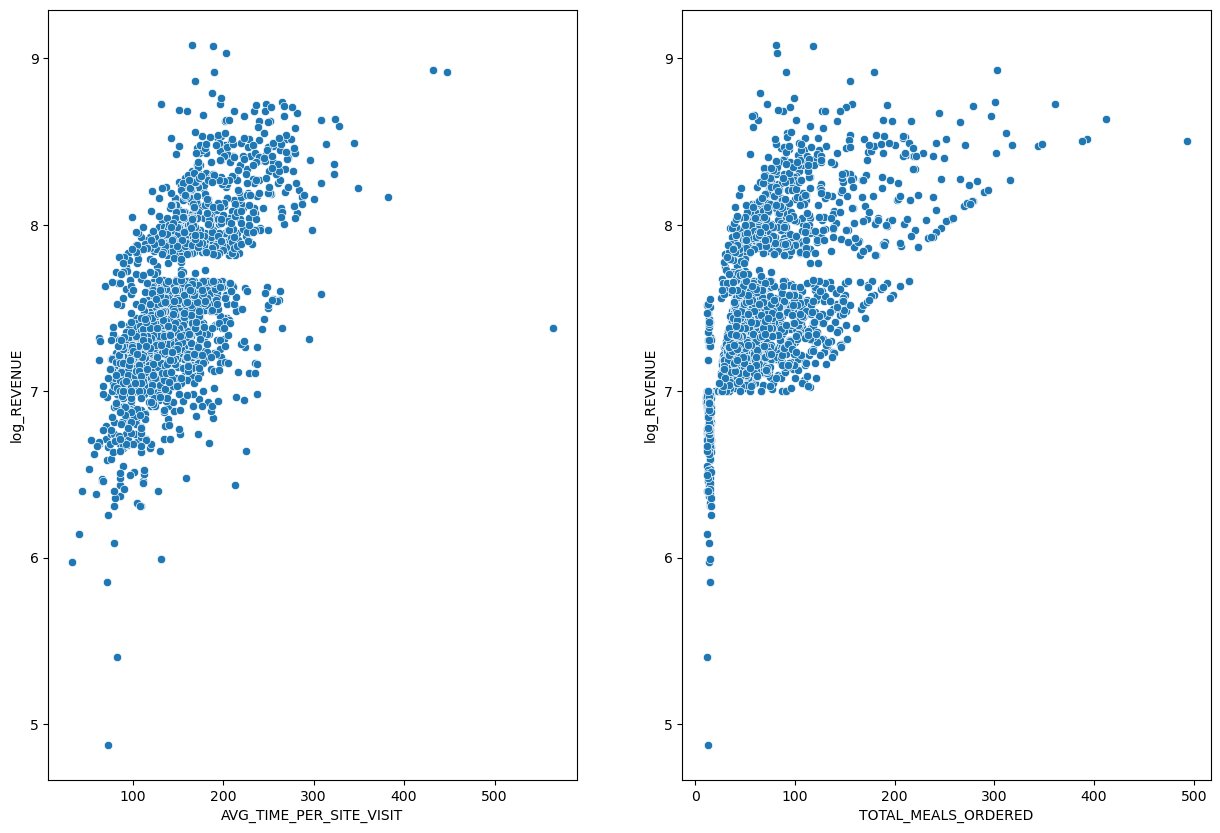

In [13]:
# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


## full baths ##

# first plot window
plt.subplot(1, 2, 1)

# developing a boxplot
sns.scatterplot(x     = 'AVG_TIME_PER_SITE_VISIT',
            y     = 'log_REVENUE',
            data  = chef)


# titles and labels
plt.xlabel(xlabel = 'AVG_TIME_PER_SITE_VISIT')
plt.ylabel(ylabel = 'log_REVENUE')



## half baths ##

# second plot window
plt.subplot(1, 2, 2)


# developing a boxplot
sns.scatterplot(x     = 'TOTAL_MEALS_ORDERED',
            y     = 'log_REVENUE',
            data  = chef)


# titles and labels
plt.xlabel(xlabel = 'TOTAL_MEALS_ORDERED')
plt.ylabel(ylabel = 'log_REVENUE')


# displaying the plot
plt.tight_layout
plt.show()

The following correlation is used to determine whether or not we want to conduct our study based on the normal REVENUE or the log of the REVENUE. As a result, I examine each column to determine whether the connection between log or revenue is greater, the same, or less. At the conclusion of the process, value counts examines the table to determine which column has the greatest correlation with the log REVENUE value. Because of this, I use the log REVENUE for further analysis as well as the model training.

In [14]:
# placeholder column for y-variable recommendation
chef_corr['recommended'] = 0


# filling in placeholder
for index, column in chef_corr.iterrows():
    
    # if Sale_Price is higher
    if abs(chef_corr.loc[ index, 'REVENUE']) >  abs(chef_corr.loc[ index, 'log_REVENUE']):
        chef_corr.loc[ index , 'recommended'] = 'REVENUE'
        
        
    # if log_Sale_Price is higher 
    elif abs(chef_corr.loc[ index, 'REVENUE']) <  abs(chef_corr.loc[ index, 'log_REVENUE']):
        chef_corr.loc[ index , 'recommended'] = 'log_REVENUE'
    
    
    # in case they are tied
    else:
        chef_corr.loc[ index , 'recommended'] = 'Tie'

# checking results
chef_corr["recommended"].value_counts(normalize = True,
                                       sort      = True,
                                       ascending = False).round(decimals = 2)

log_REVENUE    0.59
Tie            0.24
REVENUE        0.18
Name: recommended, dtype: float64

### Adding Features
I describe new features in the cell that can be found below. Creating a correlation between logins and log REVENUE begins with the TOTAL LOGINS, which is a total of logins for both mobile and PC devices. After that, I create a single column that contains both the TOTAL MEALS ORDERED and TOTAL PHOTOS VIEWED values as sum of them. Putting the final polish on the feature engineering by creating two Binary columns that check whether or not a customer has ever cancelled after noon and whether or not the weekly plan is higher than seven.

In [15]:
chef['TOTAL_LOGINS'] = chef['MOBILE_LOGINS'] + chef['PC_LOGINS']
chef['m_MEALS_PHOTOS'] = chef['TOTAL_MEALS_ORDERED'] + chef['TOTAL_PHOTOS_VIEWED']
chef['bool_CANCELLATIONS_AFTER_NOON'] = '0'
chef['bool_WEEKLY_PLAN_7'] = '0'

for index, column in chef.iterrows():
        if abs(chef.loc[ index, 'CANCELLATIONS_AFTER_NOON']) >  0:
            chef.loc[ index , 'bool_CANCELLATIONS_AFTER_NOON'] = '1'
            
        if abs(chef.loc[ index, 'WEEKLY_PLAN']) >  5:
            chef.loc[ index , 'bool_WEEKLY_PLAN_7'] = '1'


## Linear Regression
I conduct a linear regression with all of the known variables, with the exception of the categorical ones, in order to get a general idea of the current r squared value of the regression to log revenue. This provides an insight into how well the data is modeled without the inclusion of any feature engineering or the application of various models. As a result, I begin by printing the names of all columns and then copying them into the linear regression model. But nevertheless, I exclude the REVENUE and Feature Engineered columns from the model to get an unbiased r squared value.

In [16]:
# formatting each explanatory variable for statsmodels
for val in chef:
    print(f"{val} +")

REVENUE +
NAME +
EMAIL +
FIRST_NAME +
FAMILY_NAME +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
CANCELLATIONS_AFTER_NOON +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
LATE_DELIVERIES  +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
AVG_MEAN_RATING +
TOTAL_PHOTOS_VIEWED +
log_REVENUE +
log_AVG_TIME_PER_SITE_VISIT +
log_AVG_PREP_VID_TIME +
log_AVG_MEAN_RATING +
TOTAL_LOGINS +
m_MEALS_PHOTOS +
bool_CANCELLATIONS_AFTER_NOON +
bool_WEEKLY_PLAN_7 +


In [17]:
# building a full model
# blueprinting a model type
lm_full = smf.ols(formula = """log_REVENUE ~    TOTAL_MEALS_ORDERED +
                                                UNIQUE_MEALS_PURCH +
                                                CONTACTS_W_CUSTOMER_SERVICE +
                                                PRODUCT_CATEGORIES_VIEWED +
                                                AVG_TIME_PER_SITE_VISIT +
                                                CANCELLATIONS_AFTER_NOON +
                                                PC_LOGINS +
                                                MOBILE_LOGINS +
                                                WEEKLY_PLAN +
                                                AVG_PREP_VID_TIME +
                                                LARGEST_ORDER_SIZE +
                                                AVG_MEAN_RATING +
                                                TOTAL_PHOTOS_VIEWED +
                                                log_AVG_TIME_PER_SITE_VISIT +
                                                log_AVG_PREP_VID_TIME +
                                                log_AVG_MEAN_RATING +
                                                TOTAL_LOGINS +
                                                m_MEALS_PHOTOS +
                                                bool_CANCELLATIONS_AFTER_NOON +
                                                bool_WEEKLY_PLAN_7""",
                               data = chef)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_REVENUE   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     204.1
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:13:12   Log-Likelihood:                -325.38
No. Observations:                1946   AIC:                             688.8
Df Residuals:                    1927   BIC:                             794.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              4.1310      0.387     10.664      0.000       3.371       4.891
bool_CANCELLATIONS_AFTER_NOON[T.1]     0.0076      0.018      0.408      0.683      -0.029       0.044
bool_WEEKLY_PLAN_7[T.1]               -0.0166      0.017     -0.963      0.336      -0.050       0.017
TOTAL_MEALS_ORDERED                    0.0017      0.000     16.796      0.000       0.001       0.002
UNIQUE_MEALS_PURCH                    -0.0074      0.003     -2.459      0.014      -0.013      -0.001
CONTACTS_W_CUSTOMER_SERVICE            0.0326      0.003     11.981      0.000       0.027       0.038
PRODUCT_CATEGORIES_VIEWED              0.0041      0.002      1.873      0.061      -0.000       0.008
AVG_TIME_PER_SITE_VISIT               -0.0002      0.001     -0.355      0.722      -0.001       0.001
CANCELLATIONS_AFTER_NOON              -0.0033      0.005     -0.639      0.523      -0.014       0.007
PC_LOGINS                             -0.0085      0.009     -0.987      0.324      -0.025       0.008
MOBILE_LOGINS                          0.0138      0.009      1.502      0.133      -0.004       0.032
WEEKLY_PLAN                            0.0004      0.001      0.637      0.524      -0.001       0.002
AVG_PREP_VID_TIME                      0.0002      0.000      1.388      0.165      -0.000       0.001
LARGEST_ORDER_SIZE                    -0.0588      0.007     -8.015      0.000      -0.073      -0.044
AVG_MEAN_RATING                       -0.1012      0.082     -1.237      0.216      -0.262       0.059
TOTAL_PHOTOS_VIEWED                   -0.0007   6.03e-05    -11.748      0.000      -0.001      -0.001
log_AVG_TIME_PER_SITE_VISIT            0.8466      0.090      9.441      0.000       0.671       1.022
log_AVG_PREP_VID_TIME                 -0.0541      0.023     -2.372      0.018      -0.099      -0.009
log_AVG_MEAN_RATING                   -0.2385      0.277     -0.862      0.389      -0.781       0.304
TOTAL_LOGINS                           0.0053      0.006      0.948      0.343      -0.006       0.016
m_MEALS_PHOTOS                         0.0010   4.77e-05     20.463      0.000       0.001       0.001
==============================================================================
Omnibus:                      135.750   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              489.492
Skew:                          -0.264   Prob(JB):                    5.11e-107
Kurtosis:                       5.400   Cond. No.                     7.27e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.35e-

## Model Development
In the following part, various models will be trained, after which their precision and model gap will be evaluated. 

### Data Preparation
The first cell is used to prepare the data frames by copying the chef dataset and removing the categorical attributes, revenue, log revenue, and attributes that are already represented by their log value. This is done in preparation for using the second cell. After that, the provided train test split method will be used to separate the dataset into the test data and the train data.

In [18]:
# preparing for scikit-learn

# Preparing a DataFrame based the the analysis above
x_data = chef.copy()

x_data = x_data.drop(['NAME', 'EMAIL','FIRST_NAME','FAMILY_NAME',  'REVENUE', 'log_REVENUE', 'AVG_TIME_PER_SITE_VISIT', 'AVG_PREP_VID_TIME', 'AVG_MEAN_RATING'], axis = 1)
#x_data = x_data.drop(['WEEKLY_PLAN','PRODUCT_CATEGORIES_VIEWED', 'TOTAL_LOGINS', 'CANCELLATIONS_AFTER_NOON' ,'bool_CANCELLATIONS_AFTER_NOON','MOBILE_LOGINS','PC_LOGINS','NAME', 'EMAIL','FIRST_NAME','FAMILY_NAME',  'REVENUE', 'log_REVENUE', 'AVG_TIME_PER_SITE_VISIT', 'AVG_PREP_VID_TIME', 'log_AVG_MEAN_RATING'], axis = 1)
#x_data = x_data.drop(['RE  VENUE', 'log_REVENUE','NAME', 'EMAIL','FIRST_NAME','FAMILY_NAME'], axis = 1)

# preparing response variable
y_data      = chef.loc[ : , 'REVENUE']
log_y_data  = chef.loc[ : , 'log_REVENUE']


# setting up train-test split
x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables (can change this)
            log_y_data, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 219)

### Linear, Lasso and ARD Regression
The Linear, Lasso, and ARD Regressions are practiced in this cell. These models, unfortunately, do not produce the intended output and have a low Testing Score as a result. Because of this, additional models will be evaluated.

In [19]:
# Setting a model name
LR_model_name = "Linear Regression"

# INSTANTIATING a model object - CHANGE THIS AS NEEDED
LR_model = sklearn.linear_model.LinearRegression()

# FITTING to the training data
LR_model_fit = LR_model.fit(x_train, y_train)


# PREDICTING on new data
LR_model_pred = LR_model.predict(x_test)


# SCORING the results
LR_model_train_score = LR_model.score(x_train, y_train).round(4) # using R-square
LR_model_test_score  = LR_model.score(x_test, y_test).round(4)   # using R-square
LR_model_gap         = abs(LR_model_train_score - LR_model_test_score).round(4)


# displaying results
printModel(LR_model_name, LR_model_train_score, LR_model_test_score, LR_model_gap)


Model Name:       Linear Regression
    Train_Score:      0.6535
    Test_Score:       0.654
    Train-Test Gap:   0.0005 
    


In [20]:
# Setting a model name
LA_model_name = "Lasso Regression"

# INSTANTIATING a model object - CHANGE THIS AS NEEDED
LA_model = sklearn.linear_model.Lasso()

# FITTING to the training data
LA_model_fit = LA_model.fit(x_train, y_train)


# PREDICTING on new data
LA_model_pred = LA_model.predict(x_test)


# SCORING the results
LA_model_train_score = LA_model.score(x_train, y_train).round(4) # using R-square
LA_model_test_score  = LA_model.score(x_test, y_test).round(4)   # using R-square
LA_model_gap         = abs(LA_model_train_score - LA_model_test_score).round(4)


# displaying results
printModel(LA_model_name, LA_model_train_score, LA_model_test_score, LA_model_gap)

Model Name:       Lasso Regression
    Train_Score:      0.4276
    Test_Score:       0.3776
    Train-Test Gap:   0.05 
    


In [21]:
# Setting a model name
ARD_model_name = "ARD Regression"

# INSTANTIATING a model object - CHANGE THIS AS NEEDED
ARD_model = sklearn.linear_model.ARDRegression()


# FITTING to the training data
ARD_model_fit = ARD_model.fit(x_train, y_train)


# PREDICTING on new data
ARD_model_pred = ARD_model.predict(x_test)


# SCORING the results
ARD_model_train_score = ARD_model.score(x_train, y_train).round(4) # using R-square
ARD_model_test_score  = ARD_model.score(x_test, y_test).round(4)   # using R-square
ARD_model_gap         = abs(ARD_model_train_score - ARD_model_test_score).round(4)


# displaying results
printModel(ARD_model_name, ARD_model_train_score, ARD_model_test_score, ARD_model_gap)

Model Name:       ARD Regression
    Train_Score:      0.57
    Test_Score:       0.5804
    Train-Test Gap:   0.0104 
    


### Regression Tree
In this part, the Pruned Regression Tree, the Unpruned Random Forest, and the Pruned Random Forest are analyzed and compared. The various input factors of the models can be used to fine-tune the models. To this point, the efficiency of an unpruned and a pruned random forest with the same input parameters has been found to be equivalent. These two models achieve the highest Test Score while complying to the requirement that the Train-Test Gap be less than 0.05.

In [22]:
PRT_model_name = 'Pruned Regression Tree'

# INSTANTIATING a model object - CHANGE THIS AS NEEDED
PRT_model = DecisionTreeRegressor(max_depth        = 200,
                                  min_samples_leaf = 30,
                                  random_state     = 219)


# FITTING to the training data
PRT_model_fit = PRT_model.fit(x_train, y_train)


# PREDICTING on new data
PRT_model_pred = PRT_model.predict(x_test)


# SCORING the results
PRT_model_train_score = PRT_model.score(x_train, y_train).round(4) # using R-square
PRT_model_test_score  = PRT_model.score(x_test, y_test).round(4)   # using R-square
PRT_model_gap         = abs(PRT_model_train_score - PRT_model_test_score).round(4)


# displaying results
printModel(PRT_model_name, PRT_model_train_score, PRT_model_test_score, PRT_model_gap)


Model Name:       Pruned Regression Tree
    Train_Score:      0.7543
    Test_Score:       0.719
    Train-Test Gap:   0.0353 
    


In [23]:
# specifying a model name
PRF_model_name = 'Pruned Random Forest'


# INSTANTIATING a random forest model with default values
PRF_model = RandomForestRegressor(n_estimators     = 200,
                              criterion        = 'mse',
                              max_depth        = 200,
                              min_samples_leaf = 13,
                              bootstrap        = True,
                              warm_start       = False,
                              random_state     = 219)


# FITTING the training data
PRF_model_fit = PRF_model.fit(x_train, y_train)


# PREDICTING based on the testing set
PRF_model_pred = PRF_model.predict(x_test)


# SCORING the results
PRF_model_train_score = PRF_model.score(x_train, y_train).round(4) # using R-square
PRF_model_test_score  = PRF_model.score(x_test, y_test).round(4)   # using R-square
PRF_model_gap         = abs(PRF_model_train_score - PRF_model_test_score).round(4)

# displaying all results including the best model
printModel(PRF_model_name, PRF_model_train_score, PRF_model_test_score, PRF_model_gap)


/Users/marc/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Model Name:       Pruned Random Forest
    Train_Score:      0.8466
    Test_Score:       0.7969
    Train-Test Gap:   0.0497 
    


This function is invoked on the best model in order to examine the influence that the various characteristics have on the model. The results demonstrate, as we had anticipated previously, that the total number of meals ordered has a significant impact on the model, followed by the log of the average amount of time spent at each location. The attribute unique meal comes in at number three on the list of most significant factors. The final step in the study involves printing out the best model along with the train score, test score, and train-test gap.

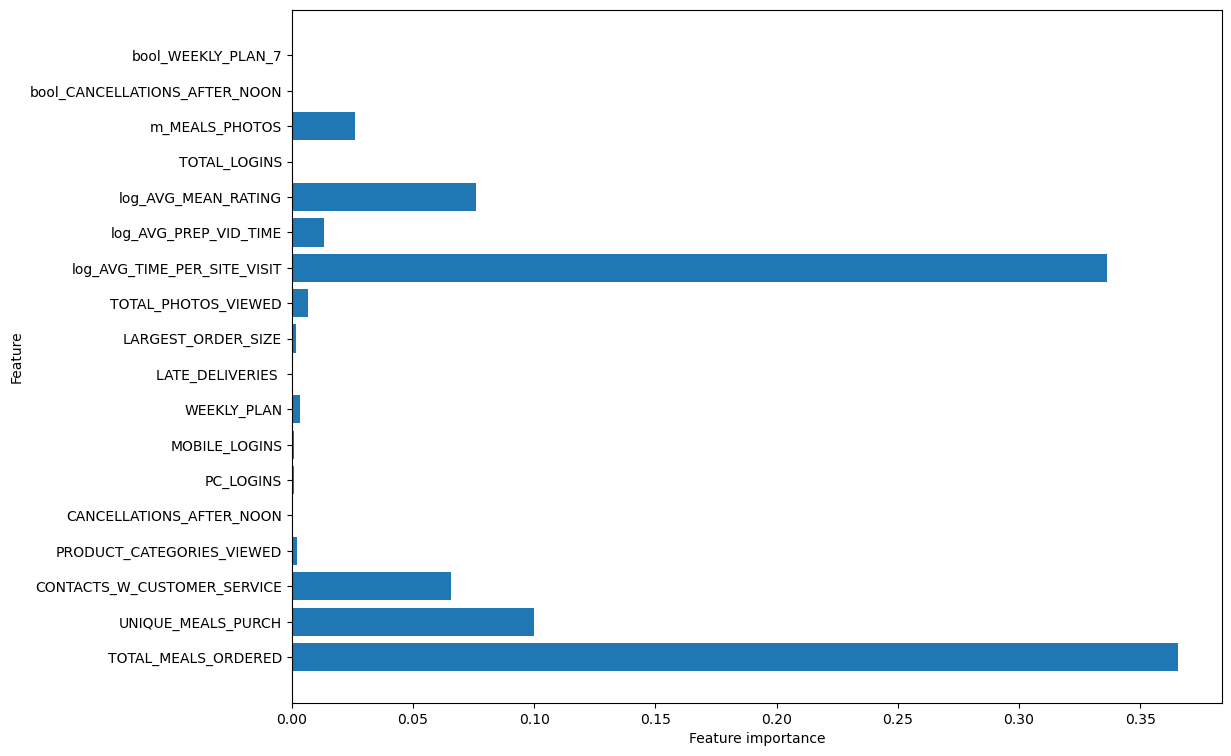

In [24]:
plot_feature_importances(PRF_model, x_train)

In [25]:
printModel(LR_model_name, LR_model_train_score, LR_model_test_score, LR_model_gap)
printModel(LA_model_name, LA_model_train_score, LA_model_test_score, LA_model_gap)
printModel(ARD_model_name, ARD_model_train_score, ARD_model_test_score, ARD_model_gap)
printModel(PRT_model_name, PRT_model_train_score, PRT_model_test_score, PRT_model_gap)

print("Best Model: ")
printModel(PRF_model_name, PRF_model_train_score, PRF_model_test_score, PRF_model_gap)

Model Name:       Linear Regression
    Train_Score:      0.6535
    Test_Score:       0.654
    Train-Test Gap:   0.0005 
    
Model Name:       Lasso Regression
    Train_Score:      0.4276
    Test_Score:       0.3776
    Train-Test Gap:   0.05 
    
Model Name:       ARD Regression
    Train_Score:      0.57
    Test_Score:       0.5804
    Train-Test Gap:   0.0104 
    
Model Name:       Pruned Regression Tree
    Train_Score:      0.7543
    Test_Score:       0.719
    Train-Test Gap:   0.0353 
    
Best Model: 
Model Name:       Pruned Random Forest
    Train_Score:      0.8466
    Test_Score:       0.7969
    Train-Test Gap:   0.0497 
    
